In [ ]:
#Problem variables
cylinder_length = 50 #m
cylinder_diameter = 3 #m
tank_length = 10 #m

water_density = 1000 #kg/m^3
air_density = 1.2 #kg/m^3


In [ ]:
def get_cylinder_volume(cylinder_length, cylinder_diameter):
    cylinder_radius = cylinder_diameter / 2
    cylinder_straight_length = cylinder_length - cylinder_diameter
    return cylinder_straight_length * 3.14159 * cylinder_radius**2 + (4/3) * 3.14159 * cylinder_radius**3 #volume of cylinder + volume of two hemispheres

In [ ]:
water_volume = get_cylinder_volume(water_reservoir_length, cylinder_diameter)
water_mass = water_volume * water_density

In [32]:
import math
import matplotlib.pyplot as plt

## Determine flow rate given gravity gradient

# I need to find pressure at end given depth of water in the cylinder
def get_gravity_at_depth(depth, gravity_gradient, end_gravity):
    return end_gravity - gravity_gradient * depth

def get_discharge_velocity(water_height, gravity_gradient, end_gravity): #water height should be water remaining in tank
        #return math.sqrt(2 * end_gravity * water_height) #TODO: add gravity gradient
        return math.sqrt(2* (end_gravity * water_height - 0.5 * gravity_gradient * water_height**2))

# volume flow rate
def get_volume_flow_rate(water_height, orifice_diameter, gravity_gradient, end_gravity):
    return get_discharge_velocity(water_height, gravity_gradient, end_gravity) * 3.14159 * (orifice_diameter / 2)**2

# get time to empty - must integrate over time since flow rate is not constant
def get_time_to_empty(water_height, orifice_diameter, gravity_gradient, end_gravity, initial_water_volume, cylinder_diameter):
    lost_volume = 0
    time = 0
    dt = 0.01
    while lost_volume < initial_water_volume:
        current_water_height = (initial_water_volume - lost_volume) / (3.14159 * (cylinder_diameter / 2)**2)
        discharge_velocity = get_discharge_velocity(current_water_height, gravity_gradient, end_gravity)
        discharge_volume = discharge_velocity * 3.14159 * (orifice_diameter / 2)**2
        lost_volume += discharge_volume * dt
        plt.plot(time, current_water_height, 'ro') #graphs the volume of water remaining
        plt.plot(time, discharge_velocity, 'bo')
        time += dt
    return time

def get_volume(height, diameter):
    return 3.14159 * (diameter / 2)**2 * height
    


15.389999999999716


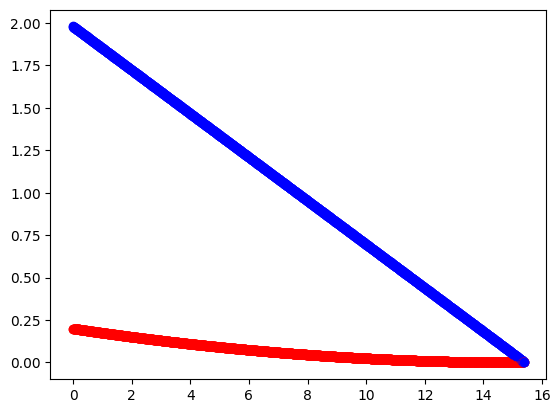

In [33]:
#Initial test: water draining from a cylinder
filled_height = 0.2 #m
orifice_diameter = 0.0065 #6.5mm
tube_inner_diameter = 0.0568 #m
water_volume = get_volume(filled_height, tube_inner_diameter)

estimated_empty_time = get_time_to_empty(filled_height, orifice_diameter, 0, 9.8, water_volume, tube_inner_diameter)
print(estimated_empty_time)

#12 seconds in trial

In [34]:
# Compute real horizontal velocity from measured water trace

horizontal_displacement = 2.74 #m
vertical_displacement = 1.32 #m

def compute_horizontal_velocity(gravity, horizontal_displacement, vertical_displacement):
    return math.sqrt(2 * gravity * horizontal_displacement / (1 - (vertical_displacement / horizontal_displacement)**2))

real_horizontal_velocity = compute_horizontal_velocity(9.8, horizontal_displacement, vertical_displacement)
print(real_horizontal_velocity)

8.362703342099092


In [35]:
#Compute angular velocity of rotating arm
number_of_rotations = 11 - 4.5 
time_to_complete = 5.8 - 3.2

angular_velocity = number_of_rotations * 2 * 3.14159 / time_to_complete #rad/s

arm_length = 0.44 #m - from center of rotation to orifice
tube_length = 0.23 #m

def get_gravity_at_point(angular_velocity, rotation_radius):
    return angular_velocity**2 * rotation_radius

end_gravity = get_gravity_at_point(angular_velocity, arm_length)
gravity_gradient = (end_gravity - get_gravity_at_point(angular_velocity, arm_length - tube_length)) / tube_length
water_volume = 3.141 * (tube_inner_diameter / 2)**2 * tube_length * 0.75 #m^3 - 75% full



In [36]:
#Compute theoretical exit velocity of water

discharge_velocity = get_discharge_velocity(tube_length, gravity_gradient, end_gravity) #discharge when tube is full (should be higher than actual)
print(discharge_velocity)

#TODO: this is much higher than the actual velcoity - need to figure out why

6.073514973536638


6.729999999999901


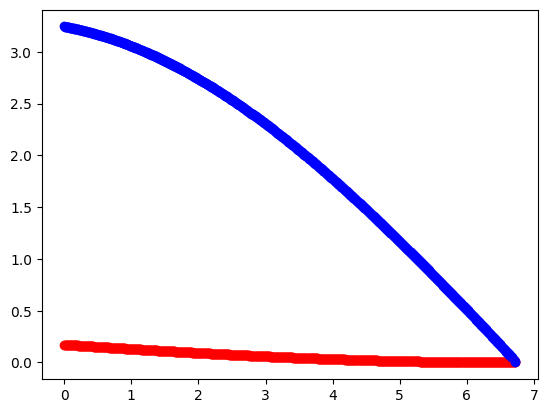

In [38]:
time = get_time_to_empty(tube_length, orifice_diameter, gravity_gradient, get_gravity_at_point(angular_velocity, arm_length - tube_length), water_volume, tube_inner_diameter)
print(time)

#6.2 seconds actual